In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
path = '/content/drive/MyDrive/텍스트마이닝/data/Online_Retail.xlsx'

In [6]:
df = pd.read_excel(path)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df[df['CustomerID'].notnull()]


In [10]:
#customerid 자료형 정수형으로 변환

df.loc[:, 'CustomerID'] = df['CustomerID'].astype(int)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [12]:
df.shape

(397884, 8)

In [13]:
#중복 제거
df.drop_duplicates(inplace=True)
df.shape

(392692, 8)

In [14]:
pd.DataFrame([{'Product':len(df['StockCode'].value_counts()),
                'Transaction':len(df['InvoiceNo'].value_counts()),
                'Customer':len(df['CustomerID'].value_counts())}], columns = ['Product', 'Transaction',
                'Customer'], index = ['counts'])

,Product,Transaction,Customer
counts,3665,18532,4338


In [15]:
df['Country'].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [16]:
df['SaleAmount'] = df['UnitPrice'] * df['Quantity']

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
aggregations = {'InvoiceNo':'count',
'SaleAmount':'sum',
'InvoiceDate':'max'
}

customer_df = df.groupby('CustomerID').agg(aggregations)
customer_df = customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346.0,1,77183.60,2011-01-18 10:01:00
1,12347.0,182,4310.00,2011-12-07 15:52:00
2,12348.0,31,1797.24,2011-09-25 13:13:00
3,12349.0,73,1757.55,2011-11-21 09:51:00
4,12350.0,17,334.40,2011-02-02 16:01:00


In [19]:
customer_df = customer_df.rename(columns={'InvoiceNo':'Freq',
                                            'InvoiceDate':'ElapsedDays'})
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346.0,1,77183.60,2011-01-18 10:01:00
1,12347.0,182,4310.00,2011-12-07 15:52:00
2,12348.0,31,1797.24,2011-09-25 13:13:00
3,12349.0,73,1757.55,2011-11-21 09:51:00
4,12350.0,17,334.40,2011-02-02 16:01:00


In [20]:
import datetime

customer_df['ElapsedDays'] = datetime.datetime(2011,12,10) - customer_df['ElapsedDays']
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346.0,1,77183.60,325 days 13:59:00
1,12347.0,182,4310.00,2 days 08:08:00
2,12348.0,31,1797.24,75 days 10:47:00
3,12349.0,73,1757.55,18 days 14:09:00
4,12350.0,17,334.40,310 days 07:59:00


In [21]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   CustomerID   4338 non-null   float64        
 1   Freq         4338 non-null   int64          
 2   SaleAmount   4338 non-null   float64        
 3   ElapsedDays  4338 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 135.7 KB


In [22]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days + 1)
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346.0,1,77183.60,326
1,12347.0,182,4310.00,3
2,12348.0,31,1797.24,76
3,12349.0,73,1757.55,19
4,12350.0,17,334.40,311


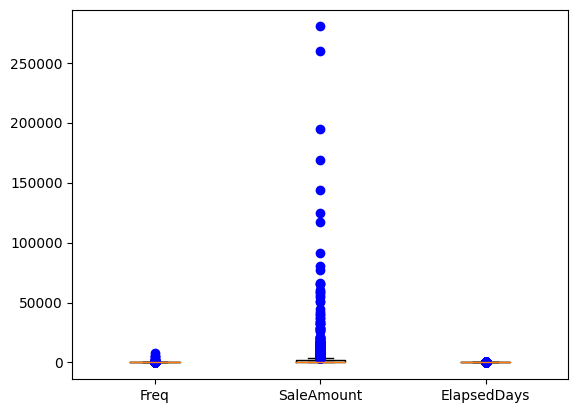

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], customer_df['ElapsedDays']], sym = 'bo')
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount','ElapsedDays'])
plt.show()



In [24]:
#log1p() :주어진 숫자에 1을 더해서 자연로그(e) 계산한 것


import math

x = 0.5
math.log1p(x)


0.4054651081081644

In [25]:
#로그를 취하는 이유
# 데이터 값 왜곡(distortion)이 심함
# log함수 사용해서 분포를 조정

import numpy as np

customer_df['FreqLog'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmountLog'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDaysLog'] = np.log1p(customer_df['ElapsedDays'])

customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,FreqLog,SaleAmountLog,ElapsedDaysLog
0,12346.0,1,77183.60,326,0.693147,11.253955,5.789960
1,12347.0,182,4310.00,3,5.209486,8.368925,1.386294
2,12348.0,31,1797.24,76,3.465736,7.494564,4.343805
3,12349.0,73,1757.55,19,4.304065,7.472245,2.995732
4,12350.0,17,334.40,311,2.890372,5.815324,5.743003


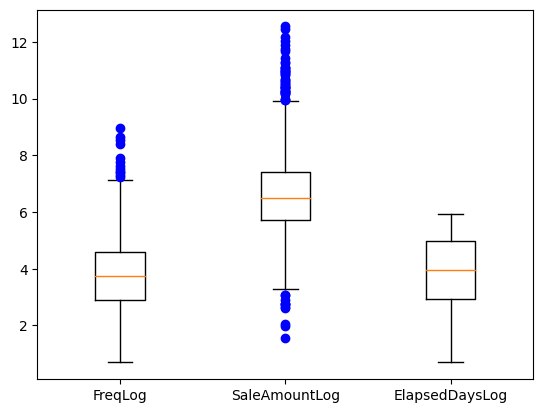

In [26]:
#조정된 데이터 boxplot그려 확인

fig, ax = plt.subplots()

ax.boxplot([customer_df['FreqLog'], customer_df['SaleAmountLog'], customer_df['ElapsedDaysLog']], sym='bo')
plt.xticks([1,2,3], ['FreqLog', 'SaleAmountLog', 'ElapsedDaysLog'])
plt.show()

모델링

-kmeans()

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [36]:
df = customer_df.copy()

In [37]:
df[['FreqLog', 'SaleAmountLog', 'ElapsedDaysLog']].values

array([[ 0.69314718, 11.25395523,  5.78996017],
       [ 5.20948615,  8.36892517,  1.38629436],
       [ 3.4657359 ,  7.49456369,  4.34380542],
       ...,
       [ 2.56494936,  5.1876651 ,  2.19722458],
       [ 6.58202514,  7.62390095,  1.60943791],
       [ 4.26267988,  7.51658563,  3.78418963]])

In [38]:
x_features = df[['FreqLog', 'SaleAmountLog', 'ElapsedDaysLog']].values


In [39]:
#정규분포로 scaling해야 함 (서로 단위가 틀린 속성 정보 지님)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_features_sc = sc.fit_transform(x_features)

In [40]:
x_features_sc

array([[-2.43820181,  3.7077163 ,  1.47888429],
       [ 1.18898578,  1.41490344, -1.89064214],
       [-0.21146474,  0.72002428,  0.37233877],
       ...,
       [-0.9349095 , -1.11333158, -1.27014755],
       [ 2.29130702,  0.82281217, -1.71990073],
       [ 0.42858139,  0.73752572, -0.05585907]])

최적의 k 값 찾기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

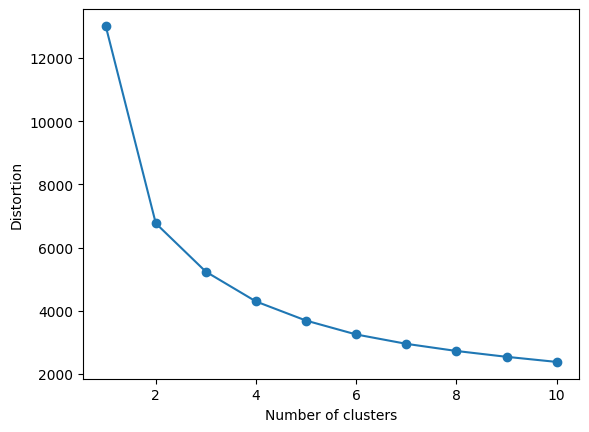

In [41]:
#ELbow

distortions = []

for i in range(1, 11):
    kmean_i = KMeans(n_clusters=i, random_state=42) #모델 생성
    kmean_i.fit(x_features_sc) #모델 훈련 (비지도 학습 (라벨x))
    distortions.append(kmean_i.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#.inertia_
#kmeans에서 각 cluster 중심(centroid)와 해당 클러스터에 속한 데이터 포인트 간 제곱 거리의 합
#inerta_가 최소화하는 방향으로 클러스터 형성

In [47]:
distortions

[13014.0,
 6767.450436001563,
 5236.9521732340545,
 4295.74317903207,
 3690.936511907311,
 3251.8542678037156,
 2955.7472483434885,
 2729.5370129479084,
 2545.2107639194855,
 2383.3387814862253]

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [54]:
y_labels = kmeans.fit_predict(x_features_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
y_labels # 클러스터(군집) 현재 3개 >> [0,1,2]
#순서가 상관 없다 !

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

In [57]:
df['ClusterLabel'] = y_labels

In [58]:
df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,FreqLog,SaleAmountLog,ElapsedDaysLog,ClusterLabel
0,12346.0,1,77183.60,326,0.693147,11.253955,5.789960,0
1,12347.0,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348.0,31,1797.24,76,3.465736,7.494564,4.343805,0
3,12349.0,73,1757.55,19,4.304065,7.472245,2.995732,0
4,12350.0,17,334.40,311,2.890372,5.815324,5.743003,2


In [59]:
df['ClusterLabel'].value_counts()

ClusterLabel
0    1830
2    1511
1     997
Name: count, dtype: int64

결과 분석 및 시각화

In [70]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.4 MB/s eta 0:00:00


In [71]:
#최적의 k 찾기

#실루엣 점수

from matplotlib import cm

def silhouetteviz(n_cluster, x_features):
    kmean = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmean.fit_predict(x_features)

    #실제값과 예측값의 사이를 유클리드 거리
    silhouette_values = silhouette_samples(x_features, y_labels, metric='euclidean') # 유클리드 거리

    #초기화
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    #클러스터 수 만큼 반복
    for c in range(n_cluster):
        c_silhouette = silhouette_values[y_labels == c ]
        c_silhouette.sort()
        y_ax_upper += len(c_silhouette)

        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette,
                height= 1.0, edgecolor = 'none', color = color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette)

    silhouetter_avg = np.mean(silhouette_values)
    # print(silhouetter_avg)
    plt.axvline(silhouetter_avg, color='red', linestyle='--')
    plt.title('클러스터 수 : ' +str(n_cluster)+'\n'\
              + '실루엣 점수: ' +str(round(silhouetter_avg, 3)))
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
    plt.ylabel('클러스터')
    plt.xlabel('실루엣 계수')
    plt.tight_layout()
    plt.show()





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


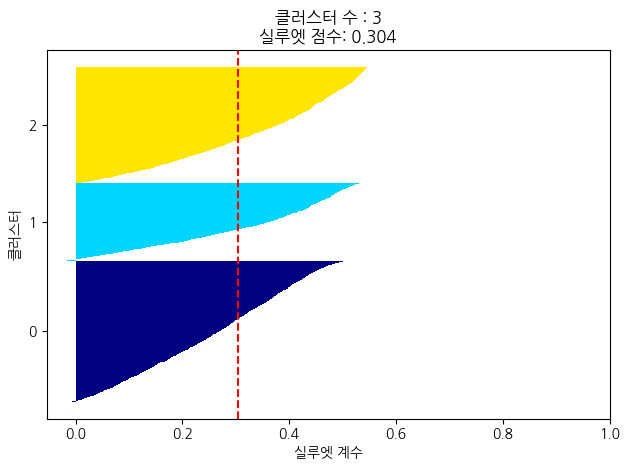

In [77]:
silhouetteviz(3, x_features_sc) # x_features_sc >>정규화 한 값

# cluster : 3개, 속성은 standard scaler 로 표준화 scaled값 사용


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


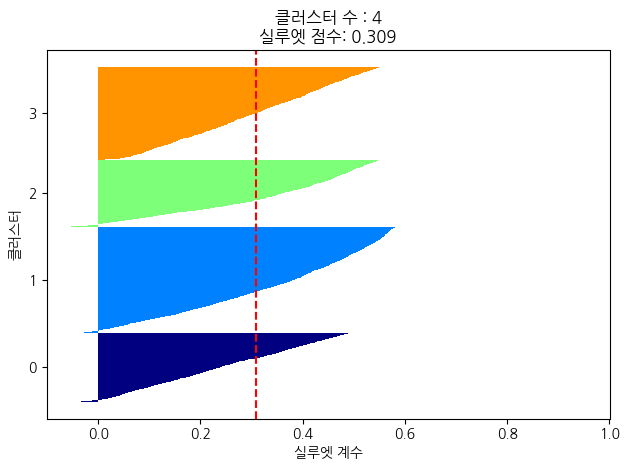

In [80]:
silhouetteviz(4, x_features_sc)
# cluster : 4개, 속성은 standard scaler 로 표준화 scaled값 사용
# 실루엣 계수 막대가 김 (1에 가까울 수록 잘 군집 된것 )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


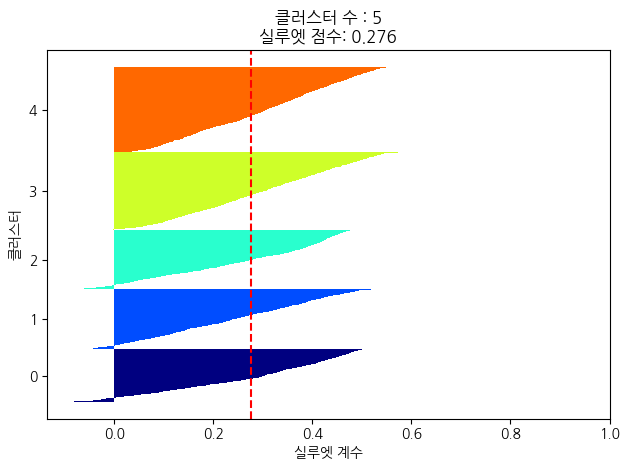

In [85]:
silhouetteviz(5, x_features_sc)

Cluster 수에 따른 cluster 데이터 분포 시각화 함수

In [88]:
def clusterScatter(n_cluster, x_features):
    c_colors = []
    kmeans = KMeans(n_clusters= n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)
    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        # 클러스터 색상 설정
        # cluster 내 데이터 분포를 산점도 표현, 동그라미로 시각화
        plt.scatter(x_features[y_labels ==i, 0],x_features[y_labels ==i, 1],
                    marker='o', color=c_color, edgecolor='black', s=50,
                    label='cluster'+str(i)
                    )
        # 각 클러스터의 중심점(centroid) 별(*)로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1],
                    marker='*', color=c_colors[i], edgecolor='w', s=100)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


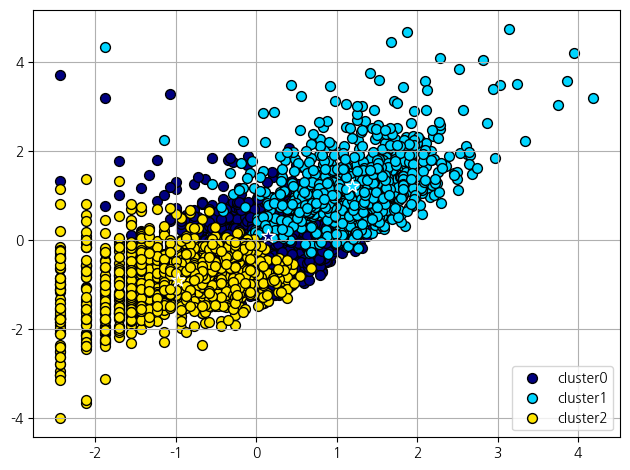

In [89]:
clusterScatter(3, x_features_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


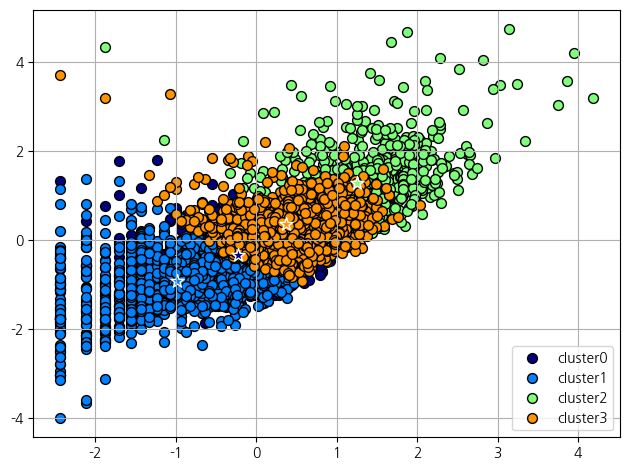

In [90]:
clusterScatter(4, x_features_sc)


In [91]:
kmeans.cluster_centers_

array([[ 0.14815704,  0.08006983, -0.07034678],
       [ 1.18782972,  1.2215219 , -1.09002981],
       [-0.96604988, -0.90578407,  0.80694128]])

분석 결과

In [92]:
#실루엣 분석 결과, 최적의 k는 4로 사려됨 (실루엣 점수 : 0.309)


결정된 k 적용, 최적읜 kmean모델

In [106]:
best_cluster = 4

kmeans = KMeans(n_clusters= best_cluster, random_state=42)
y_labels = kmeans.fit_predict(x_features_sc)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [107]:
df['Cluster_label'] = y_labels

In [108]:
df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,FreqLog,SaleAmountLog,ElapsedDaysLog,ClusterLabel,Cluster_label
0,12346.0,1,77183.60,326,0.693147,11.253955,5.789960,0,3
1,12347.0,182,4310.00,3,5.209486,8.368925,1.386294,1,2
2,12348.0,31,1797.24,76,3.465736,7.494564,4.343805,0,3
3,12349.0,73,1757.55,19,4.304065,7.472245,2.995732,0,3
4,12350.0,17,334.40,311,2.890372,5.815324,5.743003,2,1


In [109]:
df['Cluster_label'].value_counts()

Cluster_label
1    1370
3    1201
0     895
2     872
Name: count, dtype: int64

In [110]:
df_cluster = df['Cluster_label'].value_counts().to_frame().reset_index()

In [113]:
df_cluster.index = df_cluster.index + 1 #index가 1부터 나오게

In [114]:
df_cluster

,Cluster_label,count
1,1,1370
2,3,1201
3,0,895
4,2,872


In [117]:
df_cluster.to_csv('/content/drive/MyDrive/텍스트마이닝/data/Online_Retail_Cluster.csv')

클러스터 분석

In [118]:
df.columns


Index(['CustomerID', 'Freq', 'SaleAmount', 'ElapsedDays', 'FreqLog',
       'SaleAmountLog', 'ElapsedDaysLog', 'ClusterLabel', 'Cluster_label'],
      dtype='object')

In [119]:
#각 클러스터 고객수

df.groupby('Cluster_label')['CustomerID'].count()

Cluster_label
0     895
1    1370
2     872
3    1201
Name: CustomerID, dtype: int64

In [120]:
# 각 클러스터 특징

customer_df = df.drop(['FreqLog','SaleAmountLog', 'ElapsedDaysLog'], axis= 1)

In [122]:
customer_df = df.drop(['FreqLog','SaleAmountLog', 'ElapsedDaysLog','ClusterLabel'], axis= 1)

In [123]:
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays,Cluster_label
0,12346.0,1,77183.60,326,3
1,12347.0,182,4310.00,3,2
2,12348.0,31,1797.24,76,3
3,12349.0,73,1757.55,19,3
4,12350.0,17,334.40,311,1
...,...,...,...,...,...
4333,18280.0,10,180.60,278,1
4334,18281.0,7,80.82,181,1
4335,18282.0,12,178.05,8,0
4336,18283.0,721,2045.53,4,2


In [124]:
#주문 1회당 평균 구매 금액 : SalesAmountAVG

customer_df['SalesAmountAVG'] = customer_df['SaleAmount'] / customer_df['Freq']

In [125]:
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays,Cluster_label,SalesAmountAVG
0,12346.0,1,77183.60,326,3,77183.600000
1,12347.0,182,4310.00,3,2,23.681319
2,12348.0,31,1797.24,76,3,57.975484
3,12349.0,73,1757.55,19,3,24.076027
4,12350.0,17,334.40,311,1,19.670588
...,...,...,...,...,...,...
4333,18280.0,10,180.60,278,1,18.060000
4334,18281.0,7,80.82,181,1,11.545714
4335,18282.0,12,178.05,8,0,14.837500
4336,18283.0,721,2045.53,4,2,2.837074


In [127]:
#클러스터 별 분석

customer_df.drop(['CustomerID'], axis= 1).groupby('Cluster_label').mean()

,Freq,SaleAmount,ElapsedDays,SalesAmountAVG
Cluster_label,,,,
0,38.349721,608.202806,20.870391,32.118196
1,14.964234,297.675402,187.294891,43.291973
2,278.464450,7020.739553,13.612385,96.665836
3,79.139883,1509.548037,97.043297,103.489540


In [128]:
customer_df_per_group = \
customer_df.drop(['CustomerID'], axis= 1).groupby('Cluster_label').mean()

In [129]:
customer_df_per_group.index

Index([0, 1, 2, 3], dtype='int32', name='Cluster_label')

In [130]:
customer_df_per_group.index = customer_df_per_group.index + 1


In [131]:
customer_df_per_group

,Freq,SaleAmount,ElapsedDays,SalesAmountAVG
Cluster_label,,,,
1,38.349721,608.202806,20.870391,32.118196
2,14.964234,297.675402,187.294891,43.291973
3,278.464450,7020.739553,13.612385,96.665836
4,79.139883,1509.548037,97.043297,103.489540
